In [23]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-top-50-bestselling-books-2009-2019/bestsellers with categories.csv


In [24]:
df= pd.read_csv('/kaggle/input/amazon-top-50-bestselling-books-2009-2019/bestsellers with categories.csv')

print(df.head())
print(df.shape)
print(df.columns)
print(df.describe())

                                                Name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     Author  User Rating  Reviews  Price  Year        Genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  
(550, 7)
Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')
       User Rating       Reviews       Price         Year
count   550.000000    550.000000  

In [25]:
df.drop_duplicates(inplace=True)
df.rename(columns={"Name":"Title","Year":"Publication Year", "User Rating":"Rating"}, inplace=True)
print(df.columns)

Index(['Title', 'Author', 'Rating', 'Reviews', 'Price', 'Publication Year',
       'Genre'],
      dtype='object')


In [26]:
df["Price"] = df["Price"].astype(float)

author_counts= df["Author"].value_counts()
print(author_counts)

author_counts.head(10).to_csv("top_authors.csv")

Author
Jeff Kinney                           12
Gary Chapman                          11
Rick Riordan                          11
Suzanne Collins                       11
American Psychological Association    10
                                      ..
Keith Richards                         1
Chris Cleave                           1
Alice Schertle                         1
Celeste Ng                             1
Adam Gasiewski                         1
Name: count, Length: 248, dtype: int64


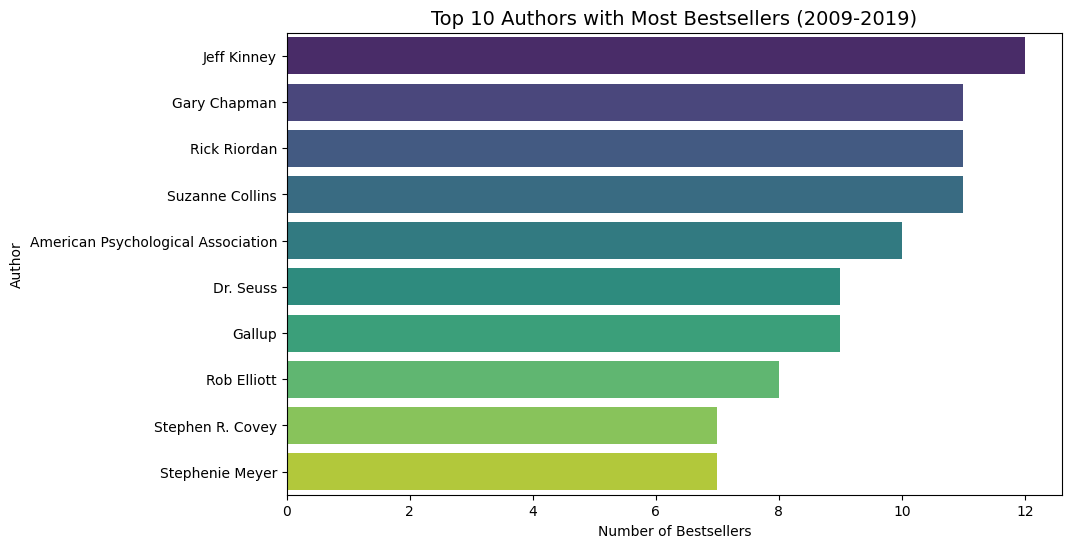

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get top 10 authors
top_authors = author_counts.head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=top_authors.values, y=top_authors.index, palette="viridis")

plt.title("Top 10 Authors with Most Bestsellers (2009-2019)", fontsize=14)
plt.xlabel("Number of Bestsellers")
plt.ylabel("Author")
plt.show()
